# Data Science, Prediction, and Forecasting - Assignment 6

## Exponential filtering

Implement the exponential filtering (i.e., exponential moving average) algorithm in Python and apply it to the two data sets in the [`data`](data/) directory. The data set [`iglesias2013.dat`](data/iglesias2013.dat) is binary and contains the input sequence used in [Iglesias et al. (2013)](https://doi.org/10.1016/j.neuron.2013.09.009). The data set [`usdchf.dat`](data/usdchf.dat) contains the daily closing exchange rates of the US Dollar in Swiss Francs in 2010 and into most of 2011. Explore the range of possible parameter settings when filtering the two data sets and get a feeling for the effects of changes to parameter values on the filtered time series.


In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the datasets
iglesias2013 = np.loadtxt('data/iglesias2013.dat')
usdchf = np.loadtxt('data/usdchf.dat')

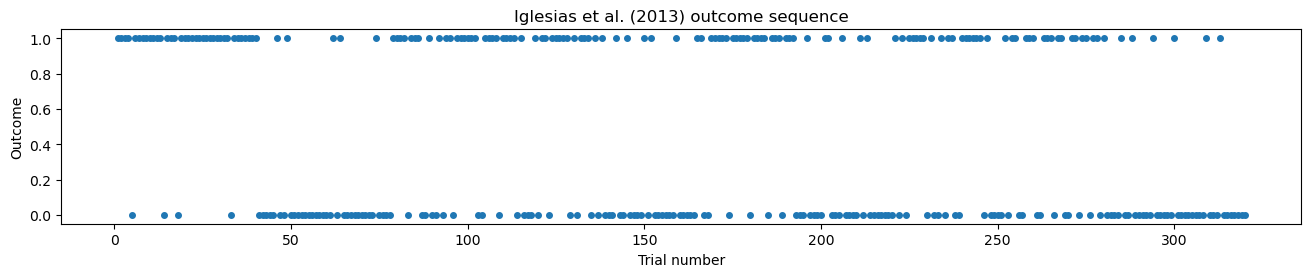

In [3]:
# Adjust the dot size
plt.rcParams['lines.markersize'] = 4
# Make the plot bigger in the notebook
plt.rcParams['figure.figsize'] = (16, 16)
# Plot the binary data
plt.plot(np.arange(1, len(iglesias2013)+1), iglesias2013, 'o')
plt.xlabel('Trial number')
plt.ylabel('Outcome')
plt.title('Iglesias et al. (2013) outcome sequence')
# Set the aspect ratio
axes=plt.gca()
axes.set_aspect(50)
plt.show()

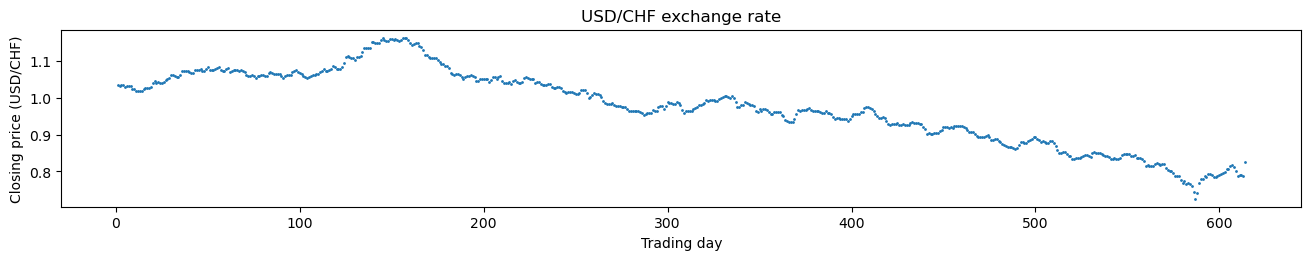

In [4]:
# Adjust the dot size
plt.rcParams['lines.markersize'] = 1
# Make the plot bigger in the notebook
plt.rcParams['figure.figsize'] = (16, 16)
# Plot the continuous data
plt.plot(np.arange(1, len(usdchf)+1), usdchf, 'o')
plt.xlabel('Trading day')
plt.ylabel('Closing price (USD/CHF)')
plt.title('USD/CHF exchange rate')
# Set the aspect ratio
axes=plt.gca()
axes.set_aspect(200)
plt.show()

In [5]:
# Rescorla-Wagner update function for exponential filtering
def rw_update(prior, outcome, alpha):
    return prior + alpha * (outcome - prior)

In [6]:
# Function that takes a sequence of outcomes and returns a sequence of posteriors
def rw_sequence(prior, outcomes, alpha):
    posteriors = [prior]
    for outcome in outcomes:
        prior = rw_update(prior, outcome, alpha)
        posteriors.append(prior)
    return posteriors

In [50]:
# Choose a prior and alpha (learning rate) value for the Iglesias et al. (2013) data set and compute the posteriors over time
iglesias_rw_prior = 0.5
iglesias_rw_alpha = 0.1
iglesias_rw_posteriors = rw_sequence(iglesias_rw_prior, iglesias2013, iglesias_rw_alpha)


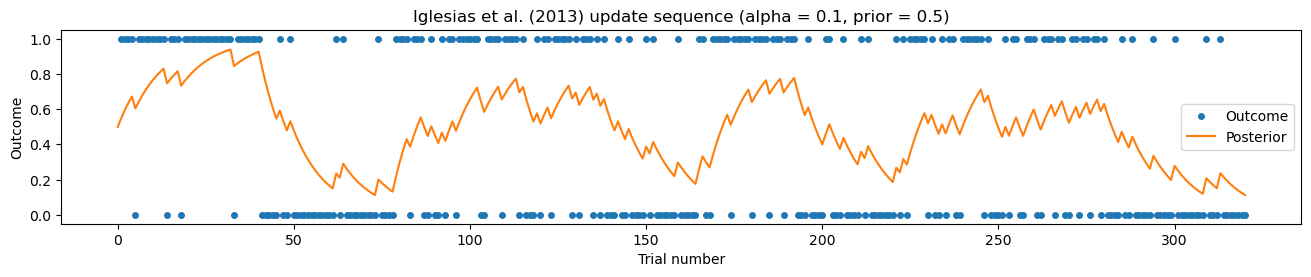

In [51]:
# Adjust the dot size
plt.rcParams['lines.markersize'] = 4
# Make the plot bigger in the notebook
plt.rcParams['figure.figsize'] = (16, 16)
# Plot the outcomes
plt.plot(np.arange(1, len(iglesias2013)+1), iglesias2013, 'o')
# Plot the posteriors
plt.plot(np.arange(0, len(iglesias_rw_posteriors)), iglesias_rw_posteriors, '-')
# Labels
plt.xlabel('Trial number')
plt.ylabel('Outcome')
# Inclue alpha and prior in the title
plt.title('Iglesias et al. (2013) update sequence (alpha = ' + str(iglesias_rw_alpha) + ', prior = ' + str(iglesias_rw_prior) + ')')
# Legend
plt.legend(['Outcome', 'Posterior'])
# Set the aspect ratio
axes=plt.gca()
axes.set_aspect(50)
# Show the plot
plt.show()

In [57]:
# Create the same kind of plot for the USD/CHF data set
usdchf_rw_prior = 1
usdchf_rw_alpha = 0.1
usdchf_rw_posteriors = rw_sequence(usdchf_rw_prior, usdchf, usdchf_rw_alpha)


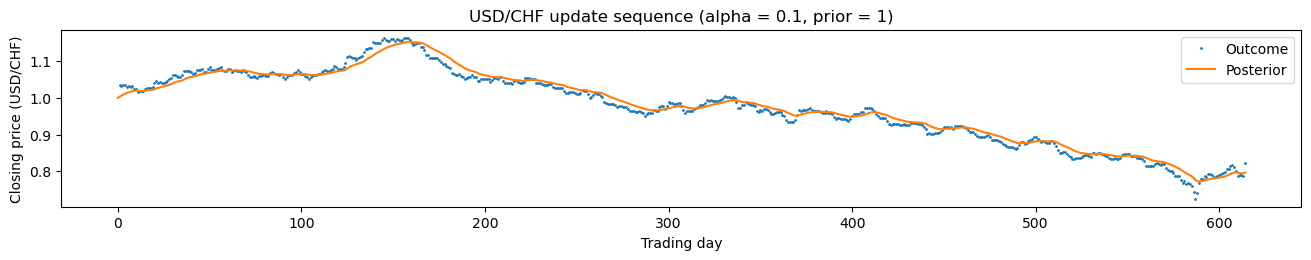

In [58]:
# Adjust the dot size
plt.rcParams['lines.markersize'] = 1
# Make the plot bigger in the notebook
plt.rcParams['figure.figsize'] = (16, 16)
# Plot the outcomes
plt.plot(np.arange(1, len(usdchf)+1), usdchf, 'o')
# Plot the posteriors
plt.plot(np.arange(0, len(usdchf_rw_posteriors)), usdchf_rw_posteriors, '-')
# Labels
plt.xlabel('Trading day')
plt.ylabel('Closing price (USD/CHF)')
# Inclue alpha and prior in the title
plt.title('USD/CHF update sequence (alpha = ' + str(usdchf_rw_alpha) + ', prior = ' + str(usdchf_rw_prior) + ')')
# Legend
plt.legend(['Outcome', 'Posterior'])
# Set the aspect ratio
axes=plt.gca()
axes.set_aspect(200)
# Show the plot
plt.show()


Now we can go back to our settings of initial value (prior) and learning rate (alpha). By playing around with these, we can see that the initial value is not very important because it washes out after enough outcome observations. However, the learning rate has a strong influence on the trajectory of posteriors. The higher the learning rate, the closer the posterior is to the outcome. The lower the learning rate, the closer the posterior is to the prior. Consequently, the trajectory of posteriors is the smoother the lower the learning rate is.


## Kalman filtering

Implement the simple one-dimensional Kalman filter discussed the lecture in Python and repeat the above exercise, but now using Kalman filtering instead of exponential filtering.





In [11]:
# Kalman filter update function
def kf_update(prior_mean, prior_precision, outcome, epsilon, theta):
    # Precision update
    posterior_precision = 1/(1/prior_precision + theta) + 1/epsilon
    # Mean update
    posterior_mean = prior_mean + 1/(epsilon * posterior_precision) * (outcome - prior_mean)
    # Return the posterior mean and precision
    return posterior_mean, posterior_precision

In [12]:
# Function that takes a sequence of outcomes and returns a sequence of posteriors
def kf_sequence(prior_mean, prior_precision, outcomes, epsilon, theta):
    posteriors = [prior_mean, prior_precision]
    for outcome in outcomes:
        prior_mean, prior_precision = kf_update(prior_mean, prior_precision, outcome, epsilon, theta)
        posteriors = np.vstack((posteriors, [prior_mean, prior_precision]))
    return posteriors

In [13]:
 # Choose a prior mean and precision as well as epsilon and theta for the Iglesias et al. (2013) data set and compute the posteriors over time
iglesias_kf_prior_mean = 0.5
iglesias_kf_prior_precision = 1.0
iglesias_kf_epsilon = 2
iglesias_kf_theta = 0.05
iglesias_kf_posteriors = kf_sequence(iglesias_kf_prior_mean, iglesias_kf_prior_precision, iglesias2013, iglesias_kf_epsilon, iglesias_kf_theta)

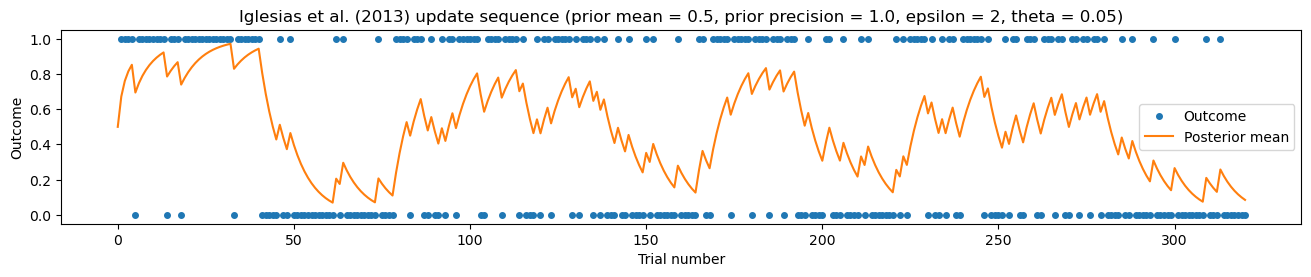

In [20]:
# Make the same kind of plot as above, but now for the Kalman filter
# Adjust the dot size
plt.rcParams['lines.markersize'] = 4
# Make the plot bigger in the notebook
plt.rcParams['figure.figsize'] = (16, 16)
# Plot the outcomes
plt.plot(np.arange(1, len(iglesias2013)+1), iglesias2013, 'o')
# Plot the posterior means
plt.plot(np.arange(0, len(iglesias_kf_posteriors)), iglesias_kf_posteriors[:, 0], '-')
# Labels
plt.xlabel('Trial number')
plt.ylabel('Outcome')
# Inclue prior mean, prior precision, epsilon, and theta in the title
plt.title('Iglesias et al. (2013) update sequence (prior mean = ' + str(iglesias_kf_prior_mean) + ', prior precision = ' + str(iglesias_kf_prior_precision) + ', epsilon = ' + str(iglesias_kf_epsilon) + ', theta = ' + str(iglesias_kf_theta) + ')')
# Legend
plt.legend(['Outcome', 'Posterior mean'])
# Set the aspect ratio
axes=plt.gca()
axes.set_aspect(50)
# Show the plot
plt.show()

In [42]:
# Now do the same for the USD/CHF data set
usdchf_kf_prior_mean = 1.0
usdchf_kf_prior_precision = 128
usdchf_kf_epsilon = 0.1
usdchf_kf_theta = 0.001
usdchf_kf_posteriors = kf_sequence(usdchf_kf_prior_mean, usdchf_kf_prior_precision, usdchf, usdchf_kf_epsilon, usdchf_kf_theta)

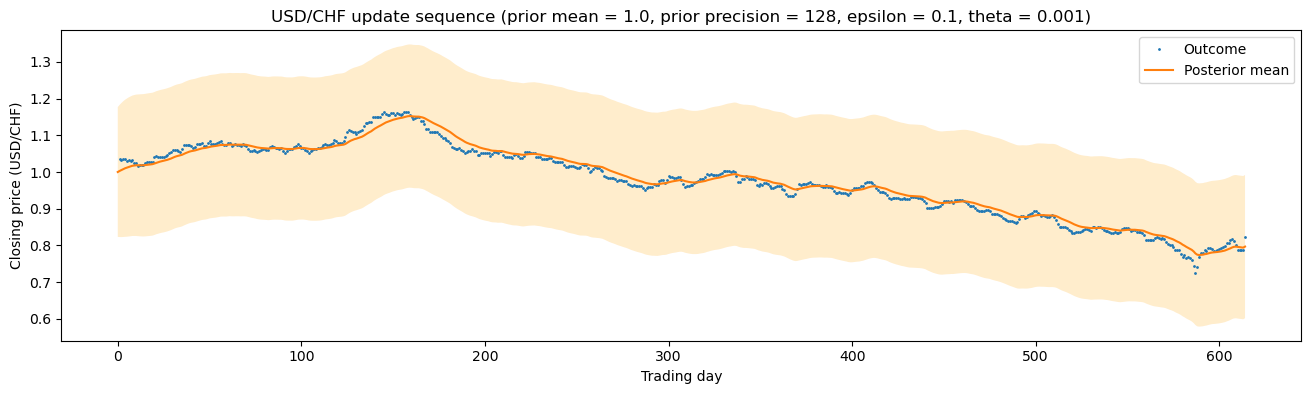

In [43]:
# Adjust the dot size
plt.rcParams['lines.markersize'] = 1
# Make the plot bigger in the notebook
plt.rcParams['figure.figsize'] = (16, 16)
# Plot the outcomes
plt.plot(np.arange(1, len(usdchf)+1), usdchf, 'o')
# Plot the posterior means
plt.plot(np.arange(0, len(usdchf_kf_posteriors)), usdchf_kf_posteriors[:, 0], '-')
# Plot a shaded region to indicate two standard deviations from the posterior mean (i.e., plus or minus 2/sqrt(posterior_precision))
plt.fill_between(np.arange(0, len(usdchf_kf_posteriors)), usdchf_kf_posteriors[:, 0] - 2/np.sqrt(usdchf_kf_posteriors[:, 1]), usdchf_kf_posteriors[:, 0] + 2/np.sqrt(usdchf_kf_posteriors[:, 1]), facecolor='orange', alpha=0.2)
# Labels
plt.xlabel('Trading day')
plt.ylabel('Closing price (USD/CHF)')
# Inclue prior mean, prior precision, epsilon, and theta in the title
plt.title('USD/CHF update sequence (prior mean = ' + str(usdchf_kf_prior_mean) + ', prior precision = ' + str(usdchf_kf_prior_precision) + ', epsilon = ' + str(usdchf_kf_epsilon) + ', theta = ' + str(usdchf_kf_theta) + ')')
# Legend
plt.legend(['Outcome', 'Posterior mean'])
# Set the aspect ratio
axes=plt.gca()
axes.set_aspect(200)
# Show the plot
plt.show()


With the Kalman Filter, we have four parameters we can adjust. Again we see that chaning the initial values does not have a lasting influence on the trajectory - it washes out after a number of observations. However, adjustments to $\varepsilon$ and $\vartheta$ have a strong and lasting influence on how the observations are filtered.